In [ ]:
## Regresion Lienal Generalizada

$$\hat{y} = \alpha + \beta_1 \times  x_1 +\ldots \beta_n \times x_n + \varepsilon$$
$$ MIN \varepsilon ^2 = MIN \sum (y_i - \hat{y}_i)^2$$
$$ MIN \sum (y_i -\alpha + \beta_1 \times  x_1 +\ldots \beta_n \times x_n )^2$$
$$\hat{\beta}= (X^T X)^{-1} X^Ty$$

In [ ]:
import pandas as pd
import os
import numpy as np
df=pd.read_csv("./Datos/Valoracion.csv")

In [ ]:
df.head()

In [ ]:
df=df.drop(columns=["Estado Civil"])

In [ ]:
df.head()

In [ ]:
Variable_Dependiente="Anyo"
Variable_Independiente=['Valoracion_A', 'Valoracion_B', 'Valoracion_C', 'Valoracion_D',
       'Valoracion_E', 'Valoracion_F', 'Valoracion_G']

$$\hat{\beta}= (X^T X)^{-1} X^Ty$$

In [ ]:
df_in=np.array(df[Variable_Independiente].values)
df_de=np.array(df[Variable_Dependiente].values)

In [ ]:
df_in.T @ df_in

In [ ]:
aes=np.linalg.inv(df_in.T @ df_in)@df_in.T@df_de

### bidimensional
$$y=ax+b$$
### Generalizando
$$y=a_1x_1+a_2x_2+...+a_nx_n + b$$

In [ ]:
b=df_de.mean()-

Tengo que multiplicar cada elemento de la lista **aes** 
por su correspondeinte variable en media

In [ ]:
df[Variable_Independiente].mean().values

In [ ]:
len(aes)

In [ ]:
a=0
for i,j in zip(aes,df[Variable_Independiente].mean().values):
    a+=i*j

In [ ]:
np.dot(aes,df[Variable_Independiente].mean().values)

In [ ]:
a

In [ ]:
b=df_de.mean()-a

In [ ]:
b

In [ ]:
aes

$y=-40.62565159\times Valoracion A + 
    97.06280232 \times Valoracion B +
    \ldots
    8.19361609\times Valoracion G -1258.809883784772$ 

In [ ]:
# Entrenamiento=df[:int(len(df)/2)]
# Validacion=df[int(len(df)/2):]

Calculad las predicciones a partir de las variables independientes de vuestra muestra de validacion

1. Calcluda los coeficientes de la recta de regresión los **aes** y el b del tablon de entrenamiento.
2. Calculad los valores estimados a partir de los coefientes calculados ene l paso previo.
3. Haced un gráfico comparativo de los valores reales con los valores predichos.

en el punto 2 lo que hay que hacer es 
la fila 250000 será multiplicada por los coeficientes aes y se le sumara el valor de b

***Coninuando con todo el dataset el alumno debería terminarlo por su cuenta***

In [40]:
def prediccion(r):
    return b + np.dot(aes,r.values)
    

In [42]:
df["Anyo_prediccion"]=df[Variable_Independiente].apply(prediccion,axis=1)

In [43]:
import matplotlib.pyplot as plt

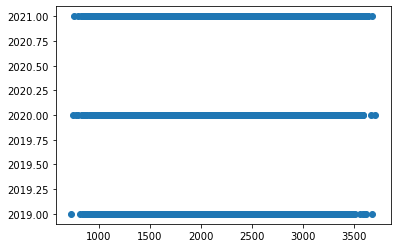

In [45]:
plt.scatter(df["Anyo_prediccion"],df["Anyo"]);

In [46]:
import statsmodels.formula.api as smf

In [48]:
Variable_Independiente

['Valoracion_A',
 'Valoracion_B',
 'Valoracion_C',
 'Valoracion_D',
 'Valoracion_E',
 'Valoracion_F',
 'Valoracion_G']

In [49]:
modelo=smf.ols("""Anyo~Valoracion_A + 
               Valoracion_B + 
               Valoracion_C +
               Valoracion_D +
               Valoracion_E + 
               Valoracion_F + 
               Valoracion_G""",data=df).fit()

In [52]:
parametros=modelo.params.to_dict()

In [53]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Anyo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.570
Date:                Fri, 21 Jul 2023   Prob (F-statistic):             0.0248
Time:                        20:57:45   Log-Likelihood:            -3.7011e+05
No. Observations:              300000   AIC:                         7.402e+05
Df Residuals:                  299994   BIC:                         7.403e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2020.1079      0.030   6.71e+04      0.000    2020.049    2020.167
Valoracion_A    -0.0004      0.000     -1.727      0.084      -0.001    4.76e-05
Valoracion_B     0.0004      0.000      2.164      0.030    4.22e-05       0.001
Valoracion_C     0.0006      0.000      1.308      0.191      -0.000       0.002
Valoracion_D  1.289e-05      0.000      0.027      0.978      -0.001       0.001
Valoracion_E    -0.0009      0.000     -2.040      0.041      -0.002    -3.7e-05
Valoracion_F    -0.0005      0.000     -2.131      0.033      -0.001   -4.02e-05
Valoracion_G     0.0004      0.000      1.851      0.064   -2.48e-05       0.001
==============================================================================
Omnibus:                  1685197.565   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30899.173
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       1.472   Cond. No.                     4.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
modelo1=smf.ols("""Anyo~
               Valoracion_B + 
               Valoracion_E + 
               Valoracion_F""",data=df).fit()

In [55]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Anyo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.851
Date:                Fri, 21 Jul 2023   Prob (F-statistic):            0.00909
Time:                        21:06:24   Log-Likelihood:            -3.7011e+05
No. Observations:              300000   AIC:                         7.402e+05
Df Residuals:                  299996   BIC:                         7.403e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2020.1218      0.024   8.53e+04      0.000    2020.075    2020.168
Valoracion_B     0.0009      0.000      1.988      0.047    1.27e-05       0.002
Valoracion_E    -0.0009      0.000     -2.048      0.041      -0.002   -4.03e-05
Valoracion_F    -0.0007      0.000     -1.811      0.070      -0.002    6.12e-05
==============================================================================
Omnibus:                  1685132.974   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30899.706
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       1.472   Cond. No.                         834.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
modelo1

In [58]:
df["Anyo_M1"]=modelo1.predict(df)
df["Anyo_M"]=modelo.predict(df)

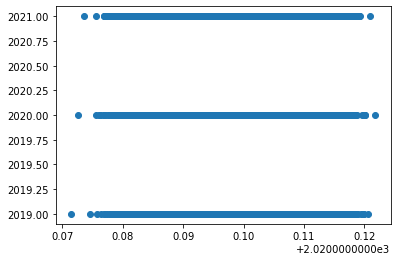

In [59]:
plt.scatter(df["Anyo_M"],df["Anyo"]);

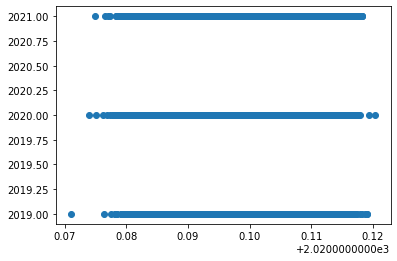

In [60]:
plt.scatter(df["Anyo_M1"],df["Anyo"]);

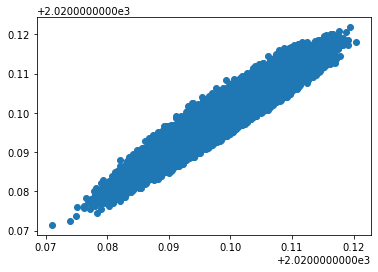

In [61]:
plt.scatter(df["Anyo_M1"],df["Anyo_M"]);

In [62]:
df.corr()

,Anyo,Valoracion_A,Valoracion_B,Valoracion_C,Valoracion_D,Valoracion_E,Valoracion_F,Valoracion_G,Anyo_prediccion,Anyo_M1,Anyo_M
Anyo,1.000000,-0.002780,0.003685,0.001751,-0.000211,-0.003745,-0.003365,0.003481,0.003514,0.006205,0.006544
Valoracion_A,-0.002780,1.000000,0.088060,0.234496,-0.048715,0.000378,0.990940,0.075080,-0.107145,-0.476826,-0.424866
Valoracion_B,0.003685,0.088060,1.000000,0.048628,0.038200,-0.001144,-0.015330,0.995320,0.961094,0.593866,0.563112
Valoracion_C,0.001751,0.234496,0.048628,1.000000,-0.097782,-0.000800,0.145720,-0.047616,-0.060528,-0.048731,0.267526
Valoracion_D,-0.000211,-0.048715,0.038200,-0.097782,1.000000,0.094200,-0.044900,0.047313,0.199015,-0.010480,-0.032299
Valoracion_E,-0.003745,0.000378,-0.001144,-0.000800,0.094200,1.000000,0.000572,-0.001060,0.127865,-0.603475,-0.572224
Valoracion_F,-0.003365,0.990940,-0.015330,0.145720,-0.044900,0.000572,1.000000,-0.019568,-0.200953,-0.542255,-0.514174
Valoracion_G,0.003481,0.075080,0.995320,-0.047616,0.047313,-0.001060,-0.019568,1.000000,0.965214,0.593336,0.531954
Anyo_prediccion,0.003514,-0.107145,0.961094,-0.060528,0.199015,0.127865,-0.200953,0.965214,1.000000,0.592304,0.536996
Anyo_M1,0.006205,-0.476826,0.593866,-0.048731,-0.010480,-0.603475,-0.542255,0.593336,0.592304,1.000000,0.948215


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
modelo_sk=LinearRegression()

In [65]:
modelo_sk?

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\daniel montes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an e

In [67]:
modelo_entrenado=modelo_sk.fit(df[Variable_Independiente],df[Variable_Dependiente])

In [69]:
df["Anoy_SK"]=modelo_entrenado.predict(df[Variable_Independiente])

In [72]:
df[["Anoy_SK","Anyo_M","Anyo_M1","Anyo_prediccion"]]

,Anoy_SK,Anyo_M,Anyo_M1,Anyo_prediccion
0,2020.092305,2020.092289,2020.092125,1499.476806
1,2020.096809,2020.097819,2020.098140,2432.695097
2,2020.096446,2020.096405,2020.097919,1456.651249
3,2020.105842,2020.106415,2020.105305,2792.094353
4,2020.098459,2020.098707,2020.098254,1996.623037
...,...,...,...,...
299995,2020.096080,2020.096103,2020.095393,1614.754461
299996,2020.102480,2020.102733,2020.099496,1715.319683
299997,2020.099513,2020.100161,2020.098127,2431.981399
299998,2020.095189,2020.095848,2020.095966,2126.752925
